In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVR

In [3]:
# reading in the dataset and making a copy
df = pd.read_csv("tedsd_puf_2019.csv")
df1 = df.copy()
df1.head()

,DISYR,CASEID,STFIPS,CBSA2010,EDUC,MARSTAT,SERVICES,DETCRIM,LOS,PSOURCE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,2019,20191553576,2,-9,4,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1
1,2019,20191465214,2,-9,3,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
2,2019,20191443889,2,-9,2,1,7,-9,35,1,...,0,0,0,0,0,0,9,4,0,3
3,2019,20191409377,2,-9,3,1,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,3
4,2019,20191479567,2,-9,3,3,7,-9,37,1,...,0,0,0,0,0,0,9,4,0,1


In [4]:
df1 = df.copy()
# from conversation with "house of Hope recovery" class 4 which is "transfer to a different facility" would also be considered a success in addition to course completion
# using replace to clean the dataset.
df1['REASON'] = df1['REASON'].replace(4, 1)
df1['REASON'] = df1['REASON'].replace(2, 0)
df1['REASON'] = df1['REASON'].replace(3, 0)
df1['REASON'] = df1['REASON'].replace(5, 0)
df1['REASON'] = df1['REASON'].replace(6, 0)
df1['REASON'] = df1['REASON'].replace(7, 0)
df1['REASON'].value_counts()

REASON
1    1095432
0     627071
Name: count, dtype: int64

In [5]:
# checking a correlation matrix to get an idea of which columns are more heavily correlated
reason = df1['REASON']
df1_corr = df1.corr()
df1_corr.unstack().sort_values()
variable = df1_corr['REASON'].sort_values()
variable.tail(20)

SUB2                     0.017823
ALCFLG                   0.025359
HLTHINS                  0.032940
LIVARAG_D                0.044982
FREQ1_D                  0.054572
DSMCRIT                  0.060707
METHUSE                  0.061555
AGE                      0.068791
EMPLOY_D                 0.070319
SUB3                     0.070463
SUB3_D                   0.076043
PRIMPAY                  0.100120
ARRESTS_D                0.116399
DIVISION                 0.128182
SUB2_D                   0.146111
CASEID                   0.146813
REGION                   0.153238
FREQ_ATND_SELF_HELP_D    0.183071
REASON                   1.000000
DISYR                         NaN
Name: REASON, dtype: float64

In [6]:
# time to clean up the data starting with SUB1, SUB1_D, SUB2, SUB2_D, SUB3, and SUB3_D
# alcohol could be a success, mmj could be a success
df1['SUB1_D'] = df1['SUB1_D'].replace(14, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(16, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(18, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(12, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(13, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(2, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(3, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(4, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(5, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(6, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(7, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(8, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(10, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(11, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(15, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(17, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(19, 0)

df1['SUB1'] = df1['SUB1'].replace(14, 1)
df1['SUB1'] = df1['SUB1'].replace(16, 1)
df1['SUB1'] = df1['SUB1'].replace(18, 1)
df1['SUB1'] = df1['SUB1'].replace(12, 1)
df1['SUB1'] = df1['SUB1'].replace(13, 1)
df1['SUB1'] = df1['SUB1'].replace(2, 1)
df1['SUB1'] = df1['SUB1'].replace(3, 0)
df1['SUB1'] = df1['SUB1'].replace(4, 0)
df1['SUB1'] = df1['SUB1'].replace(5, 0)
df1['SUB1'] = df1['SUB1'].replace(6, 0)
df1['SUB1'] = df1['SUB1'].replace(7, 0)
df1['SUB1'] = df1['SUB1'].replace(8, 0)
df1['SUB1'] = df1['SUB1'].replace(9, 0)
df1['SUB1'] = df1['SUB1'].replace(10, 0)
df1['SUB1'] = df1['SUB1'].replace(11, 0)
df1['SUB1'] = df1['SUB1'].replace(15, 0)
df1['SUB1'] = df1['SUB1'].replace(17, 0)
df1['SUB1'] = df1['SUB1'].replace(19, 0)

df1['SUB2_D'] = df1['SUB2_D'].replace(14, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(16, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(18, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(12, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(13, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(2, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(3, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(4, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(5, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(6, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(7, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(8, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(10, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(11, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(15, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(17, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(19, 0)

df1['SUB2'] = df1['SUB2'].replace(14, 1)
df1['SUB2'] = df1['SUB2'].replace(16, 1)
df1['SUB2'] = df1['SUB2'].replace(18, 1)
df1['SUB2'] = df1['SUB2'].replace(12, 1)
df1['SUB2'] = df1['SUB2'].replace(13, 1)
df1['SUB2'] = df1['SUB2'].replace(2, 1)
df1['SUB2'] = df1['SUB2'].replace(3, 0)
df1['SUB2'] = df1['SUB2'].replace(4, 0)
df1['SUB2'] = df1['SUB2'].replace(5, 0)
df1['SUB2'] = df1['SUB2'].replace(6, 0)
df1['SUB2'] = df1['SUB2'].replace(7, 0)
df1['SUB2'] = df1['SUB2'].replace(8, 0)
df1['SUB2'] = df1['SUB2'].replace(9, 0)
df1['SUB2'] = df1['SUB2'].replace(10, 0)
df1['SUB2'] = df1['SUB2'].replace(11, 0)
df1['SUB2'] = df1['SUB2'].replace(15, 0)
df1['SUB2'] = df1['SUB2'].replace(17, 0)
df1['SUB2'] = df1['SUB2'].replace(19, 0)

df1['SUB3_D'] = df1['SUB3_D'].replace(14, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(16, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(18, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(12, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(13, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(2, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(3, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(4, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(5, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(6, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(7, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(8, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(10, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(11, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(15, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(17, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(19, 0)

df1['SUB3'] = df1['SUB3'].replace(14, 1)
df1['SUB3'] = df1['SUB3'].replace(16, 1)
df1['SUB3'] = df1['SUB3'].replace(18, 1)
df1['SUB3'] = df1['SUB3'].replace(12, 1)
df1['SUB3'] = df1['SUB3'].replace(13, 1)
df1['SUB3'] = df1['SUB3'].replace(2, 1)
df1['SUB3'] = df1['SUB3'].replace(3, 0)
df1['SUB3'] = df1['SUB3'].replace(4, 0)
df1['SUB3'] = df1['SUB3'].replace(5, 0)
df1['SUB3'] = df1['SUB3'].replace(6, 0)
df1['SUB3'] = df1['SUB3'].replace(7, 0)
df1['SUB3'] = df1['SUB3'].replace(8, 0)
df1['SUB3'] = df1['SUB3'].replace(9, 0)
df1['SUB3'] = df1['SUB3'].replace(10, 0)
df1['SUB3'] = df1['SUB3'].replace(11, 0)
df1['SUB3'] = df1['SUB3'].replace(15, 0)
df1['SUB3'] = df1['SUB3'].replace(17, 0)
df1['SUB3'] = df1['SUB3'].replace(19, 0)
df1['SUB1'] = df1['SUB1'].replace(-9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(-9, 0)
df1['SUB2'] = df1['SUB2'].replace(-9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 0)
df1['SUB3'] = df1['SUB3'].replace(-9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB1'].value_counts())
print(df1['SUB1_D'].value_counts())
print(df1['SUB2'].value_counts())
print(df1['SUB2_D'].value_counts())
print(df1['SUB3'].value_counts())
print(df1['SUB3_D'].value_counts())

SUB1
0    1145410
1     577093
Name: count, dtype: int64
SUB1_D
0    1153301
1     569202
Name: count, dtype: int64
SUB2
1    959459
0    763044
Name: count, dtype: int64
SUB2_D
1    990170
0    732333
Name: count, dtype: int64
SUB3
1    1278583
0     443920
Name: count, dtype: int64
SUB3_D
1    1403980
0     318523
Name: count, dtype: int64


In [7]:
# time to clean up the data with FREQ1_D, FREQ2_D, FREQ3_D
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1_D'] = df1['FREQ1_D'].replace(-9, 1)
df1['FREQ2_D'] = df1['FREQ2_D'].replace(-9, 1)
df1['FREQ3_D'] = df1['FREQ3_D'].replace(-9, 1)
# time to clean up the data with FREQ1, FREQ2, FREQ3
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1'] = df1['FREQ1'].replace(-9, 1)
df1['FREQ2'] = df1['FREQ2'].replace(-9, 1)
df1['FREQ3'] = df1['FREQ3'].replace(-9, 1)

In [8]:
# time to clean up the data with 'CASEID'
df1['CASEID'].notna().value_counts()
# CASEID has no null values and does need info filled
# we can drop this field
df1 = df1.drop(columns="CASEID")

In [9]:
# time to clean up the data with 'AGE'
df1['AGE'].value_counts()
# AGE has no null values and does need info filled

AGE
6     299636
5     289159
7     250240
8     177835
11    166636
9     150772
10    140931
4     131360
3      45887
2      37570
12     23727
1       8750
Name: count, dtype: int64

In [10]:
# time to clean up the data with 'GENDER'
# gender is not a columns where we can fill in the data and not decrease the accuracy. so for all -9 values I am replacing with 0
df1['GENDER'] = df1['GENDER'].replace(-9, 0)
df1['GENDER'].value_counts()

GENDER
1    1105534
2     616213
0        756
Name: count, dtype: int64

In [11]:
# time to clean up the data with 'DISYR'
df1['DISYR'].value_counts()
# DISYR has no null values and does need info filled
# drop this column since all values in it were 2019
df1 = df1.drop(columns="DISYR")

In [12]:
# time to clean up the data with 'RACE'
# for race, '7' indicateds 'other single race  so for all -9 values i replaces them with 7
df1['RACE'] = df1['RACE'].replace(-9, 7)
df1['RACE'].value_counts()

RACE
5    1130079
4     308571
7     185882
2      43226
8      30769
6      10408
9       9235
1       3891
3        442
Name: count, dtype: int64

In [13]:
# time to clean up the data with 'ETHNIC'
# for ETHNIC, '4' indicateds 'other single race  so for all -9 values I replaced them with 4
df1['ETHNIC'] = df1['ETHNIC'].replace(-9, 4)
df1['ETHNIC'].value_counts()

ETHNIC
4    1502028
2      63372
1      59268
3      52865
5      44970
Name: count, dtype: int64

In [14]:
# time to clean up the data with 'MARSTAT'
# for MARSTAT, hard to determine what to fill -9 with so filling with 0 at House of Hope's request
df1['MARSTAT'] = df1['MARSTAT'].replace(-9, 0)
df1['MARSTAT'].value_counts()

MARSTAT
1    895996
0    360937
4    207287
2    171400
3     86883
Name: count, dtype: int64

In [15]:
# time to clean up the data with 'EDUC'
# For EDUC, hard to determine what to fill -9 with. Options are 1-5 so filling with 2 as it was what House of Hope reported as average.
df1['EDUC'] = df1['EDUC'].replace(-9, 2)
df1['EDUC'].notna().value_counts()

EDUC
True    1722503
Name: count, dtype: int64

In [16]:
# time to clean up the data with 'EMPLOY' and 'EMPLOY_D'
# for EMPLOY, hard to determine what to fill -9 with. options are 1-4. filling with 0 as it was what House of Hope reported as average.
df1['EMPLOY'] = df1['EMPLOY'].replace(-9, 0)
df1['EMPLOY_D'] = df1['EMPLOY_D'].replace(-9, 0)
df1['EMPLOY'].value_counts()

EMPLOY
3    634880
4    542928
1    279602
0    152365
2    112728
Name: count, dtype: int64

In [17]:
# time to clean up the data with 'DETNLF' and 'DETNLF_D'
# for DETNLF, its just details on the previous columns not in labor force option so im replacing missing values with 0 as to not affect the results as much. we may want to drop this column
# drop this column at House of Hope's request
df1 = df1.drop(columns="DETNLF")
df1 = df1.drop(columns="DETNLF_D")

In [18]:
# time to clean up the data with 'PREG'
# for PREG, -9 most likely indicates male patients. replacing with 2 for "no"
df1['PREG'] = df1['PREG'].replace(-9, 2)
df1['PREG'].value_counts()

PREG
2    1704235
1      18268
Name: count, dtype: int64

In [19]:
# time to clean up the data with 'VET'
# for VET, -9 most likely indicates not a veteren so im replacing -9 with 2 for 'no'
df1['VET'] = df1['VET'].replace(-9, 2)
df1['VET'].value_counts()

VET
2    1679845
1      42658
Name: count, dtype: int64

In [20]:
# time to clean up the data with 'LIVARAG'
# for LIVARAG, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
df1['LIVARAG'] = df1['LIVARAG'].replace(-9, 1)
df1['LIVARAG_D'] = df1['LIVARAG_D'].replace(-9, 1)
df1['LIVARAG'].value_counts()

LIVARAG
3    1013787
1     436264
2     272452
Name: count, dtype: int64

In [21]:
# time to clean up the data with 'PRIMINC'
# for PRIMINC, its hard to determine what -9 could indicate so im replacing -9 with 4 at House of Hope's request for "other" being average
df1['PRIMINC'] = df1['PRIMINC'].replace(-9, 4)
df1['PRIMINC'].value_counts()

PRIMINC
4    855478
5    397327
1    312986
2     81605
3     75107
Name: count, dtype: int64

In [22]:
# time to clean up the data with 'ARRESTS' and 'ARRESTS_D'
# for 'ARRESTS' and 'ARRESTS_D', 0 indicates none so im setting -9 to none as that seems most likely to be the case if the information is missing
df1['ARRESTS'] = df1['ARRESTS'].replace(-9, 0)
df1['ARRESTS_D'] = df1['ARRESTS_D'].replace(-9, 0)
df1['ARRESTS'].value_counts()
df1['ARRESTS_D'].value_counts()

ARRESTS_D
0    1643399
1      61908
2      17196
Name: count, dtype: int64

In [23]:
# time to clean up the data with ' STFIPS'
# for ' STFIPS', there are no null values in this column but we may want to remove it because the large values could through the accuracy off
df1['STFIPS'].value_counts()
# drop this column
df1 = df1.drop(columns="STFIPS")

In [24]:
# time to clean up the data with 'REGION'
# for 'REGION', there are no null values in this column
df1['REGION'].value_counts()

REGION
1    532413
3    505555
4    378260
2    303497
0      2778
Name: count, dtype: int64

In [25]:
# time to clean up the data with 'DIVISION'
# for 'DIVISION', there are no null values in this column
df1['DIVISION'].value_counts()

DIVISION
2    372934
5    331617
8    229376
1    159479
4    152327
3    151170
9    148884
6    100660
7     73278
0      2778
Name: count, dtype: int64

In [26]:
# time to clean up the data with 'SERVICES and SERVICES_D'
# for 'SERVICES and SERVICES_D', there are no -9 values in this column
df1['SERVICES'].value_counts()
df1['SERVICES_D'].value_counts()

SERVICES_D
7    884266
2    240303
6    235771
4    179737
5    121470
1     43446
8     13267
3      4243
Name: count, dtype: int64

In [27]:
# time to clean up the data with 'DAYWAIT'
# for 'DAYWAIT', its seems safe to replace a value of missing data with a value of '0' to indicate that they didnt wait
df1['DAYWAIT'] = df1['DAYWAIT'].replace(-9, 0)
df1['DAYWAIT'].value_counts()

DAYWAIT
0    1469735
1     175018
2      34722
3      26618
4      16410
Name: count, dtype: int64

In [28]:
# time to clean up the data with 'METHUSE'
# for 'METHUSE', its seems safe to replace a value of missing data with a value of 'none'
df1['METHUSE'] = df1['METHUSE'].replace(-9, 0)
df1['METHUSE'].value_counts()

METHUSE
2    1327459
1     216239
0     178805
Name: count, dtype: int64

In [29]:
# time to clean up the data with 'LOS'
# for 'LOS', stands for length of stay this data seems irrelivent to the questions we are trying to answer so I suggest dropping the column to perserve prediction accuracy
# 1-30, 31-45, 46-60, 61-90, 91-120, 121-180, 181-365, more than
def los_to_category(days):
    if days <= 30:
        return 1
    elif days <= 31:
        return 2
    elif days <= 32:
        return 3
    elif days <= 33:
        return 4
    elif days <= 34:
        return 5
    elif days <= 35:
        return 6
    elif days <= 36:
        return 7
    else:
        return 8
# applying the function
df1['LOS'] = df1['LOS'].apply(los_to_category)
# checking values
df1['LOS'].value_counts()

LOS
1    934659
4    140555
7    128974
5    114387
6    114266
2    111830
8     93500
3     84332
Name: count, dtype: int64

In [30]:
# time to clean up the data with PSOURCE: Referral source
# for 'PSOURCE' this doesnt seem to me to be relevant data so im replacing -9 with 1 for now to indicate that it was self motivated
df1['PSOURCE'] = df1['PSOURCE'].replace(-9, 1)

In [31]:
# time to clean up the data with DETCRIM: Detailed criminal justice referral
# for 'DETCRIM' im replacing -9 with 0 for now. most of this data is missing.
df1['DETCRIM'] = df1['DETCRIM'].replace(-9, 0)
# drop this column
df1 = df1.drop(columns="DETCRIM")

In [32]:
# time to clean up the data with NOPRIOR: Previous substance use treatment episodes
# for 'NOPRIOR' im replacing -9 with 0 for now. its could go either way. we will ask clients
df1['NOPRIOR'] = df1['NOPRIOR'].replace(-9, 0)

In [33]:
# time to clean up the data with ROUTE1: Route of administration (primary)
# time to clean up the data with ROUTE2: Route of administration (secondary)
# time to clean up the data with ROUTE3: Route of administration (tertiary)
# for 'ROUTE1' replacing -9 with 0 at house of Hope's request
df1['ROUTE1'] = df1['ROUTE1'].replace(-9, 0)
df1['ROUTE2'] = df1['ROUTE2'].replace(-9, 0)
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)

In [34]:
# time to clean up the data with FRSTUSE1: Age at first use (primary)
# FRSTUSE1 is a column where its hard to determine what a value of -9 should be replaced with so im replacing it with 0 for now to have less of an impact on the data
df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 3)
# adding Beau's code
# In column FRSTUSE2 replace -9 with 0
df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 3)
print(df1['FRSTUSE2'].value_counts())
# In column FRSTUSE3 replace -9 with 0
df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 3)
print(df1['FRSTUSE3'].value_counts())

FRSTUSE2
3    1067078
2     170892
4     153705
7     103384
5      95617
6      78339
1      53488
Name: count, dtype: int64
FRSTUSE3
3    1464306
2      78630
4      57055
7      37209
5      32205
6      27655
1      25443
Name: count, dtype: int64


In [35]:
# In column DSMCRIT replace -9 with 5
df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 5)
print(df1['DSMCRIT'].value_counts())

DSMCRIT
5     790823
4     289535
8     143441
19    125445
7      82105
6      56213
9      52972
2      40101
10     39565
3      29130
11     23297
12     17972
1      12628
13      7786
15      5239
17      2246
14      2181
16      1490
18       334
Name: count, dtype: int64


In [36]:
# In column PSYPROB replace -9 with 1
df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 1)
print(df1['PSYPROB'].value_counts())

PSYPROB
1    899280
2    823223
Name: count, dtype: int64


In [37]:
# In column PRIMPAY replace -9 with 1
df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 1)
print(df1['PRIMPAY'].value_counts())

PRIMPAY
1    1038444
4     389616
5     162022
7      49127
2      44071
6      20758
3      18465
Name: count, dtype: int64


In [38]:
# In column FREQ_ATND_SELF_HELP replace -9 with 3 as that was what House of Hope reported as average
df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP'].value_counts())
# In column FREQ_ATND_SELF_HELP_D replace -9 with 3 as that was what House of Hope reported as average
df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

FREQ_ATND_SELF_HELP
1    1037604
3     389036
4     126267
2     104522
5      65074
Name: count, dtype: int64


FREQ_ATND_SELF_HELP_D
1    859331
3    452977
4    186509
2    115895
5    107791
Name: count, dtype: int64


In [39]:
# droping the CBSA2010 column
df1.drop("CBSA2010", axis=1, inplace=True)

In [40]:
df1.to_csv('cleaned_df.csv', index=False)

In [41]:
# What columns are highly correlated with the target variable 'REASON'?
high_corr_df = df1_corr['REASON'].sort_values()
print('Correlation of REASON with other variables.')
display(high_corr_df.tail(21))

Correlation of REASON with other variables.


PSYPROB                  0.013534
SUB2                     0.017823
ALCFLG                   0.025359
HLTHINS                  0.032940
LIVARAG_D                0.044982
FREQ1_D                  0.054572
DSMCRIT                  0.060707
METHUSE                  0.061555
AGE                      0.068791
EMPLOY_D                 0.070319
SUB3                     0.070463
SUB3_D                   0.076043
PRIMPAY                  0.100120
ARRESTS_D                0.116399
DIVISION                 0.128182
SUB2_D                   0.146111
CASEID                   0.146813
REGION                   0.153238
FREQ_ATND_SELF_HELP_D    0.183071
REASON                   1.000000
DISYR                         NaN
Name: REASON, dtype: float64

In [42]:
#creating a function to test the model
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [43]:
# Drop the target variable 'REASON' from the dataset
X = df1.drop(columns='REASON')
y = df1['REASON']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Make predictions with the RandomForest model
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate the RandomForest accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Train the ExtraTrees model
et_model.fit(X_train, y_train)

# Make predictions with the ExtraTrees model
y_train_pred_et = et_model.predict(X_train)
y_test_pred_et = et_model.predict(X_test)

# Calculate the ExtraTrees accuracies
train_accuracy_et = accuracy_score(y_train, y_train_pred_et)
test_accuracy_et = accuracy_score(y_test, y_test_pred_et)

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

RandomForest Training Accuracy: 0.7864320951638677
RandomForest Testing Accuracy: 0.7858380672334768
ExtraTrees Training Accuracy: 0.7642448994994202
ExtraTrees Testing Accuracy: 0.7631879152745565


In [44]:
# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Check for overfitting and underfitting in RandomForest
if train_accuracy_rf > test_accuracy_rf:
    print('RandomForest is overfitting.')
elif train_accuracy_rf < test_accuracy_rf:
    print('RandomForest is underfitting.')
else:
    print('RandomForest is fitting well.')

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

# Check for overfitting and underfitting in ExtraTrees
if train_accuracy_et > test_accuracy_et:
    print('ExtraTrees is overfitting.')
elif train_accuracy_et < test_accuracy_et:
    print('ExtraTrees is underfitting.')
else:
    print('ExtraTrees is fitting well.')

RandomForest Training Accuracy: 0.7864320951638677
RandomForest Testing Accuracy: 0.7858380672334768
RandomForest is overfitting.
ExtraTrees Training Accuracy: 0.7642448994994202
ExtraTrees Testing Accuracy: 0.7631879152745565
ExtraTrees is overfitting.


In [45]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the RandomForest model
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('RandomForest Cross-Validation Accuracy:', np.mean(rf_scores))

# Perform cross-validation on the ExtraTrees model
et_scores = cross_val_score(et_model, X_train, y_train, cv=5)
print('ExtraTrees Cross-Validation Accuracy:', np.mean(et_scores))

RandomForest Cross-Validation Accuracy: 0.7859008927205923


In [ ]:
# Time to visualize the data to see how its making its decisions
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [ ]:
# Through trial and error this is the combination of columns that give the highest accuracy while keeping the questions House of Hope would like to ask
df2 = df1[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "REASON", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]

In [ ]:
y2 = df2["REASON"].values.reshape(-1, 1)
X2 = df2.copy()
X2.drop("REASON", axis=1, inplace=True)
X2.head()
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 # Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

 # Fit the model
model = model.fit(X_train_scaled, y_train)

 # Making predictions using the testing data
predictions = model.predict(X_test_scaled)

 # Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.7569770520126513


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.583084 to fit



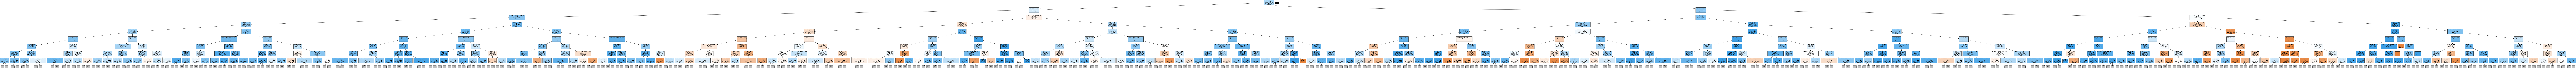

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X2.columns, class_names=["0", "1"], filled=True, max_depth=8
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
# now time to read in the results of the questionaire and get our prediction
case_id = input('Enter the case ID: ')
patient_questionnaire = pd.read_csv(f"patient_questionnaire_data_{case_id}.csv")

# making a copy, getting the columns we want and putting them in the correct order
df3 = patient_questionnaire.copy()
df3 = df3[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]

In [ ]:
# cleaning the new dataset
df3['MARSTAT'] = df3['MARSTAT'].replace('Never married', 1)
df3['MARSTAT'] = df3['MARSTAT'].replace('Now married', 2)
df3['MARSTAT'] = df3['MARSTAT'].replace('Separated', 3)
df3['MARSTAT'] = df3['MARSTAT'].replace('Divorced, widowed', 4)

df3['EMPLOY'] = df3['EMPLOY'].replace('Full-time', 1)
df3['EMPLOY'] = df3['EMPLOY'].replace('Part-time', 2)
df3['EMPLOY'] = df3['EMPLOY'].replace('Unemployed', 3)
df3['EMPLOY'] = df3['EMPLOY'].replace('Not in labor force', 4)

df3['LIVARAG'] = df3['LIVARAG'].replace('Homeless', 1)
df3['LIVARAG'] = df3['LIVARAG'].replace('Dependent living', 2)
df3['LIVARAG'] = df3['LIVARAG'].replace('Independent living', 3)

df3['DAYWAIT'] = df3['DAYWAIT'].replace('1–7', 1)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('8–14', 2)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('15–30', 3)
df3['DAYWAIT'] = df3['DAYWAIT'].replace('31 or more', 4)

df3['SERVICES'] = df3['SERVICES'].replace('Detox, 24-hour, hospital inpatient', 1)
df3['SERVICES'] = df3['SERVICES'].replace('Detox, 24-hour, free-standing residential', 2)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, hospital (non-detox)', 3)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, short term (30 days or fewer)', 4)
df3['SERVICES'] = df3['SERVICES'].replace('Rehab/residential, long term (more than 30 days)', 5)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, intensive outpatient', 6)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, non-intensive outpatient', 7)
df3['SERVICES'] = df3['SERVICES'].replace('Ambulatory, detoxification', 8)

df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('11 years and under', 1)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('12–14 years', 2)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('15–17 years', 3)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('18–20 years', 4)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('21–24 years', 5)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('25–29 years', 6)
df3['FRSTUSE1'] = df3['FRSTUSE1'].replace('30 years and over', 7)

df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('No attendance', 1)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('1–3 times per month', 2)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('4–7 times per month', 3)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('8–30 times per month', 4)
df3['FREQ_ATND_SELF_HELP_D'] = df3['FREQ_ATND_SELF_HELP_D'].replace('Some attendance, frequency is unknown', 5)

df3['PRIMPAY'] = df3['PRIMPAY'].replace('Self-pay', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Private insurance', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Medicare', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Medicaid', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Other government payments', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('No charge', 1)
df3['PRIMPAY'] = df3['PRIMPAY'].replace('Other', 1)

df3['DIVISION'] = df3['DIVISION'].replace('U.S. territories', 0)
df3['DIVISION'] = df3['DIVISION'].replace('New England', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Middle Atlantic', 2)
df3['DIVISION'] = df3['DIVISION'].replace('East North Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('West North Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('South Atlantic', 1)
df3['DIVISION'] = df3['DIVISION'].replace('East South Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('West South Central', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Mountain', 1)
df3['DIVISION'] = df3['DIVISION'].replace('Pacific', 1)

df3['PREG'] = df3['PREG'].replace('Yes', 1)
df3['PREG'] = df3['PREG'].replace('No', 2)

df3['METHUSE'] = df3['METHUSE'].replace('Yes', 1)
df3['METHUSE'] = df3['METHUSE'].replace('No', 2)

C:\Users\matth\AppData\Local\Temp\ipykernel_22180\3505313326.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['MARSTAT'] = df3['MARSTAT'].replace('Never married', 1)
C:\Users\matth\AppData\Local\Temp\ipykernel_22180\3505313326.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['EMPLOY'] = df3['EMPLOY'].replace('Part-time', 2)
C:\Users\matth\AppData\Local\Temp\ipykernel_22180\3505313326.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

In [ ]:
y3 = df2["REASON"].values.reshape(-1, 1)
X3 = df3.copy()
# X3.drop("REASON", axis=1, inplace=True)
X_train = df2[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]] 
X_test = df3[["MARSTAT", "EMPLOY", "LIVARAG", "DAYWAIT", "SERVICES", "FRSTUSE1", "FREQ_ATND_SELF_HELP_D", "PRIMPAY", "DIVISION", "PREG", "METHUSE"]]
y_train = df2["REASON"].values.reshape(-1, 1)
# y_test = train_test_split(X2, y2, random_state=78)
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
 # Create the decision tree classifier instance
model = RandomForestClassifier()
 # Fit the model
model = model.fit(X_train_scaled, y_train)

 # Making the prediction using the testing data
predictions = model.predict(X_test_scaled)
if predictions == 1:
    print("This person has a high probability of success")
else:
    print("This person has a low probability of success")

This person has a low probability of success
